In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.models as models

from core.dataset import get_train_val
import core.config as conf

import torch.optim as optim

from nets.merge import MergeNet

import utils.utils as utils

import numpy as np


c:\Users\umari\anaconda3\envs\DL38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
multi_mic = conf.logmelspectro['multi_mic']

In [3]:
data_train, data_val = get_train_val(from_h5=True)

train_loader = DataLoader(data_train, batch_size=1, shuffle=False)

data_sample = next(iter(train_loader))

for sample in data_sample:
    print(sample.shape)

torch.Size([1, 16, 960, 64])
torch.Size([1, 1, 11])
torch.Size([1, 1, 3, 224, 224])


In [4]:
frame_img = data_sample[-1].squeeze(1)

In [5]:
# model = models.vgg11(pretrained=False)

trained_model = MergeNet(custom_vid=True, custom_aud=True)
optimiser = optim.Adam(trained_model.parameters(), lr=1e-3)
epoch=16

path = os.path.join(os.getcwd(), 'results', 'checkpoints', 'MultiChannel_augment_11k_ep_' + str(epoch) + '_checkpoint.pt')


In [6]:
path

'c:\\Users\\umari\\projects\\AV-spatial-coherence\\results\\checkpoints\\MultiChannel_augment_11k_ep_16_checkpoint.pt'

In [8]:

checkpoint = torch.load(path)
# trained_model.load_state_dict(checkpoint['model'])
# optimiser.load_state_dict(checkpoint['optimizer'])
# epoch = checkpoint['epoch']

# trained_model.eval()

# # we will save the conv layer weights in this list
# model_weights =[]
# #we will save the 49 conv layers in this list
# conv_layers = []
# # get all the model children as list
# model_children = list(model.children())
# #counter to keep count of the conv layers
# counter = 0
# #append all the conv layers and their respective wights to the list
# i=0
# while i < len(model_children):
#     if type(model_children[i]) == nn.Conv2d:
#         counter+=1
#         model_weights.append(model_children[i].weight)
#         conv_layers.append(model_children[i])
#     if type(model_children[i]) == nn.Sequential:
#         j=0
#         while j < len(model_children[i]):
#             child = model_children[i][j]
#             if type(child) == nn.Conv2d:               
#                 counter+=1
#                 model_weights.append(child.weight)
#                 conv_layers.append(child)
#                 # print(child)
#             j+=1
#     i+=1
# print(f"Total convolution layers: {counter}")
# print(conv_layers)

In [14]:
checkpoint['model']

OrderedDict([('VideoNet.conv1_1.weight',
              tensor([[[[-0.0181,  0.0832,  0.0236],
                        [-0.0547,  0.0707,  0.0311],
                        [ 0.0556, -0.0311,  0.0980]],
              
                       [[ 0.0266, -0.0481,  0.0408],
                        [-0.0941,  0.0466,  0.0868],
                        [ 0.0313, -0.0636,  0.0597]],
              
                       [[-0.0005, -0.0555,  0.0789],
                        [ 0.0303,  0.0648, -0.0395],
                        [ 0.0414,  0.0608, -0.0316]]],
              
              
                      [[[ 0.0793,  0.0482,  0.1058],
                        [-0.0907,  0.0285, -0.0473],
                        [-0.0247, -0.0583, -0.0311]],
              
                       [[-0.0571,  0.0286, -0.0484],
                        [-0.0392, -0.0531,  0.0341],
                        [ 0.0530, -0.0159, -0.0371]],
              
                       [[-0.1024,  0.0646,  0.0037],
               

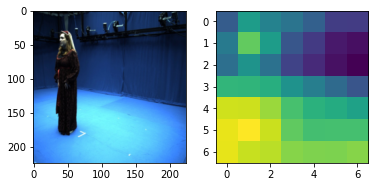

In [48]:

net_new = model.features

for layer in net_new:
    if isinstance(layer, nn.Conv2d):
        layer.requires_grad_ = False

out = net_new(frame_img)

out.squeeze_(0)

out = out.mean(dim=0).detach().numpy()

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(122)
plt.imshow(out, aspect='equal')
plt.subplot(121)
plt.imshow(frame_img[0].permute(1,2,0), aspect='equal')
plt.show()

In [51]:
a = not False

In [52]:
a

True